In [1]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:

result = pd.read_csv('result_cities.csv')
result

,place,average_index,max_index,min_index,std_index
0,"Bern, Switzerland",57.463315,97.041221,19.593450,14.766960
1,"Bordeaux, France",58.743839,99.577641,26.086957,12.459032
2,"Bremen, Germany",57.440666,97.291927,23.229814,15.358888
3,"Utrecht, Netherlands",64.890004,98.434784,17.515528,12.817918
4,"Strasbourg, France",55.593196,98.019199,22.190853,12.115330
5,"Amsterdam, Netherlands",59.483100,96.149069,17.515528,11.802711
6,"Copenhagen Municipality,Denmark",60.223626,93.190289,16.996048,13.882731
7,"Innsbruck, Austria",58.622482,92.183116,34.460548,11.069895
8,"Bristol, United Kingdom",50.688142,91.055902,14.658385,8.469805
9,"Antwerp, Belgium",60.538695,100.720498,23.229814,13.384767


In [3]:
result[['city','country']] =result['place'].str.split(',',expand=True)
result["city"]= result["city"].replace('Copenhagen Municipality', "Copenhagen") 
result

,place,average_index,max_index,min_index,std_index,city,country
0,"Bern, Switzerland",57.463315,97.041221,19.593450,14.766960,Bern,Switzerland
1,"Bordeaux, France",58.743839,99.577641,26.086957,12.459032,Bordeaux,France
2,"Bremen, Germany",57.440666,97.291927,23.229814,15.358888,Bremen,Germany
3,"Utrecht, Netherlands",64.890004,98.434784,17.515528,12.817918,Utrecht,Netherlands
4,"Strasbourg, France",55.593196,98.019199,22.190853,12.115330,Strasbourg,France
5,"Amsterdam, Netherlands",59.483100,96.149069,17.515528,11.802711,Amsterdam,Netherlands
6,"Copenhagen Municipality,Denmark",60.223626,93.190289,16.996048,13.882731,Copenhagen,Denmark
7,"Innsbruck, Austria",58.622482,92.183116,34.460548,11.069895,Innsbruck,Austria
8,"Bristol, United Kingdom",50.688142,91.055902,14.658385,8.469805,Bristol,United Kingdom
9,"Antwerp, Belgium",60.538695,100.720498,23.229814,13.384767,Antwerp,Belgium


In [4]:
coya =pd.read_csv('coya.csv')
coya

,Unnamed: 0,city,country,total_score,bike_infrastructure,bike_use_percent,road_quality
0,0,Utrecht,Netherlands,77.84,57.51,51.0,60.78
1,1,Munster,Germany,65.93,51.23,39.1,53.05
2,2,Antwerp,Belgium,60.51,34.28,28.9,53.37
3,3,Copenhagen,Denmark,60.46,55.23,29.0,61.60
4,4,Amsterdam,Netherlands,60.24,55.90,32.0,61.71
5,5,Malmo,Sweden,55.88,46.55,30.0,52.40
6,6,Hangzhou,China,52.55,32.72,30.0,35.06
7,7,Bern,Switzerland,48.76,65.10,15.0,65.46
8,8,Bremen,Germany,47.81,59.78,21.0,55.96
9,9,Hannover,Germany,46.70,53.68,19.0,51.51


In [5]:
df = result.merge(coya, on="city", how = 'inner')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.drop_duplicates('city',keep='last', inplace=True)
df

,place,average_index,max_index,min_index,std_index,city,country_x,country_y,total_score,bike_infrastructure,bike_use_percent,road_quality
0,"Bern, Switzerland",57.463315,97.041221,19.593450,14.766960,Bern,Switzerland,Switzerland,48.76,65.10,15.0,65.46
1,"Bordeaux, France",58.743839,99.577641,26.086957,12.459032,Bordeaux,France,France,45.42,60.23,10.0,59.40
2,"Bremen, Germany",57.440666,97.291927,23.229814,15.358888,Bremen,Germany,Germany,47.81,59.78,21.0,55.96
3,"Utrecht, Netherlands",64.890004,98.434784,17.515528,12.817918,Utrecht,Netherlands,Netherlands,77.84,57.51,51.0,60.78
4,"Strasbourg, France",55.593196,98.019199,22.190853,12.115330,Strasbourg,France,France,45.45,56.44,16.0,58.82
5,"Amsterdam, Netherlands",59.483100,96.149069,17.515528,11.802711,Amsterdam,Netherlands,Netherlands,60.24,55.90,32.0,61.71
6,"Copenhagen Municipality,Denmark",60.223626,93.190289,16.996048,13.882731,Copenhagen,Denmark,Denmark,60.46,55.23,29.0,61.60
7,"Innsbruck, Austria",58.622482,92.183116,34.460548,11.069895,Innsbruck,Austria,Austria,43.12,53.81,17.0,56.18
8,"Bristol, United Kingdom",50.688142,91.055902,14.658385,8.469805,Bristol,United Kingdom,United Kingdom,43.76,40.61,14.0,56.17
9,"Antwerp, Belgium",60.538695,100.720498,23.229814,13.384767,Antwerp,Belgium,Belgium,60.51,34.28,28.9,53.37


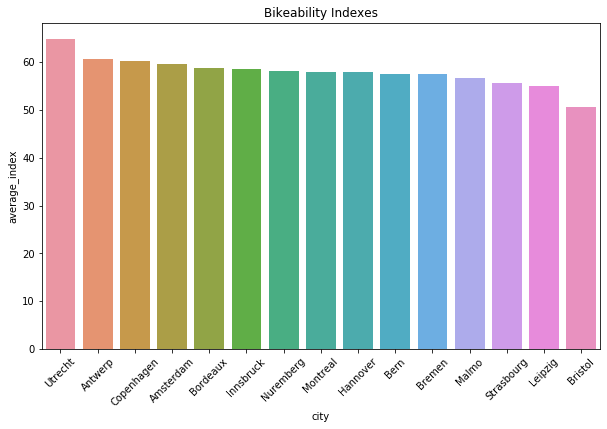

In [6]:
import seaborn as sns
plt.figure(figsize=(10,6))
# make barplot and sort bars
chart =sns.barplot(x='city', y="average_index", data=df, 
            order=df.sort_values('average_index', ascending= False).city)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Bikeability Indexes')
plt.show()

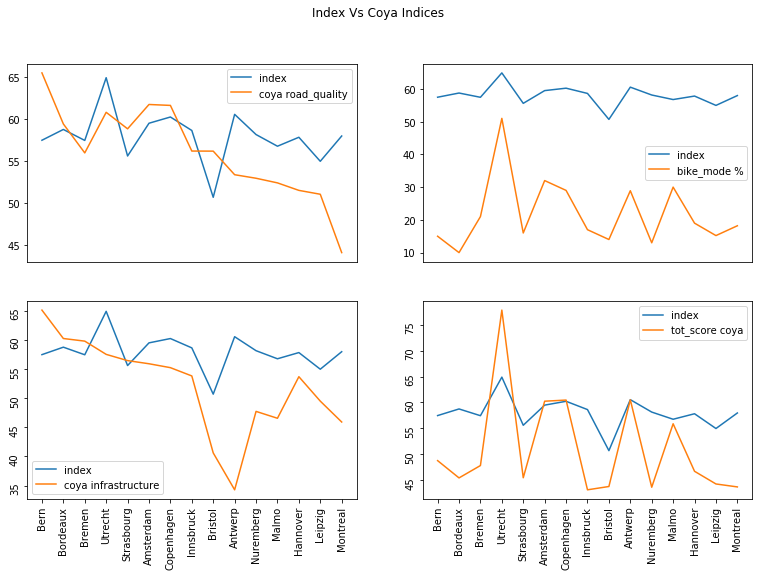

In [7]:
fig, ax = plt.subplots(2,2,figsize=(13,8))
fig.suptitle('Index Vs Coya Indices')
ax[0,0].plot(df['city'], df['average_index'], label = 'index')
ax[0,0].plot(df['city'], df['road_quality'], label = 'coya road_quality')
ax[1,0].plot(df['city'], df['average_index'], label = 'index')
ax[1,0].plot(df['city'], df['bike_infrastructure'], label = 'coya infrastructure')
ax[1,0].legend(loc = 'top right')
ax[0,0].legend(loc = 'top right')
ax[0,0].get_xaxis().set_ticks([])
ax[1,0].tick_params(labelrotation=90)

ax[1,1].plot(df['city'], df['average_index'], label = 'index')
ax[1,1].plot(df['city'], df['total_score'], label = 'tot_score coya')
ax[0,1].plot(df['city'], df['average_index'], label = 'index')
ax[0,1].plot(df['city'], df['bike_use_percent'], label = 'bike_mode %')
ax[1,1].tick_params(labelrotation=90)
ax[0,1].get_xaxis().set_ticks([])
ax[0,1].legend(loc = 'top right')
ax[1,1].legend(loc = 'top right')